# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings;
warnings.simplefilter('ignore')

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [2]:
cancer = pd.read_csv('breast_cancer_wisconsin_data.csv')
cancer.head(10)

,Sample_Code_Number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [3]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done
  # Class = 2 [for benign], 4 [for malignant]

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [4]:
cancer.dtypes
cancer.describe().transpose()

Sample_Code_Number              int64
Clump_Thickness                 int64
Uniformity_of_Cell_Size         int64
Uniformity_of_Cell_Shape        int64
Marginal_Adhesion               int64
Single_Epithelial_Cell_Size     int64
Bare_Nuclei                    object
Bland_Chromatin                 int64
Normal_Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

,count,mean,std,min,25%,50%,75%,max
Sample_Code_Number,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
Clump_Thickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Uniformity_of_Cell_Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Uniformity_of_Cell_Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal_Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single_Epithelial_Cell_Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Bland_Chromatin,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Normal_Nucleoli,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


Bare_Nuclei column is of object datatype. While exploring, we found a special character in the feature ('?' to be exact)

In [5]:
cancer.Bare_Nuclei = cancer.Bare_Nuclei.astype('int64')

ValueError: invalid literal for int() with base 10: '?'

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.

In [6]:
# We could see "?" values in column, this should be removed from data set
cancer.isna().any()
# Check for missing value in any other column
cancer[cancer==0].any()

Sample_Code_Number             False
Clump_Thickness                False
Uniformity_of_Cell_Size        False
Uniformity_of_Cell_Shape       False
Marginal_Adhesion              False
Single_Epithelial_Cell_Size    False
Bare_Nuclei                    False
Bland_Chromatin                False
Normal_Nucleoli                False
Mitoses                        False
Class                          False
dtype: bool

Sample_Code_Number             False
Clump_Thickness                False
Uniformity_of_Cell_Size        False
Uniformity_of_Cell_Shape       False
Marginal_Adhesion              False
Single_Epithelial_Cell_Size    False
Bare_Nuclei                    False
Bland_Chromatin                False
Normal_Nucleoli                False
Mitoses                        False
Class                          False
dtype: bool

In [7]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?
cancer.Bare_Nuclei[cancer.Bare_Nuclei == '?'].count()

16

In [8]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values
cancer.Bare_Nuclei.replace(to_replace='?',value=cancer.Bare_Nuclei[cancer.Bare_Nuclei != '?'].median(),inplace=True)
cancer.Bare_Nuclei = cancer.Bare_Nuclei.astype('int64')
cancer.dtypes

Sample_Code_Number             int64
Clump_Thickness                int64
Uniformity_of_Cell_Size        int64
Uniformity_of_Cell_Shape       int64
Marginal_Adhesion              int64
Single_Epithelial_Cell_Size    int64
Bare_Nuclei                    int64
Bland_Chromatin                int64
Normal_Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences.

In [9]:
# Check for correlation of variable
cancer.corr()

,Sample_Code_Number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
Sample_Code_Number,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.092533,-0.060051,-0.052072,-0.034901,-0.080226
Clump_Thickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Uniformity_of_Cell_Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Uniformity_of_Cell_Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal_Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single_Epithelial_Cell_Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare_Nuclei,-0.092533,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Bland_Chromatin,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Normal_Nucleoli,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170


In [10]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei,
# normal nucleoli and bland chromatin
# Target variable shows high correlation with most of these variables

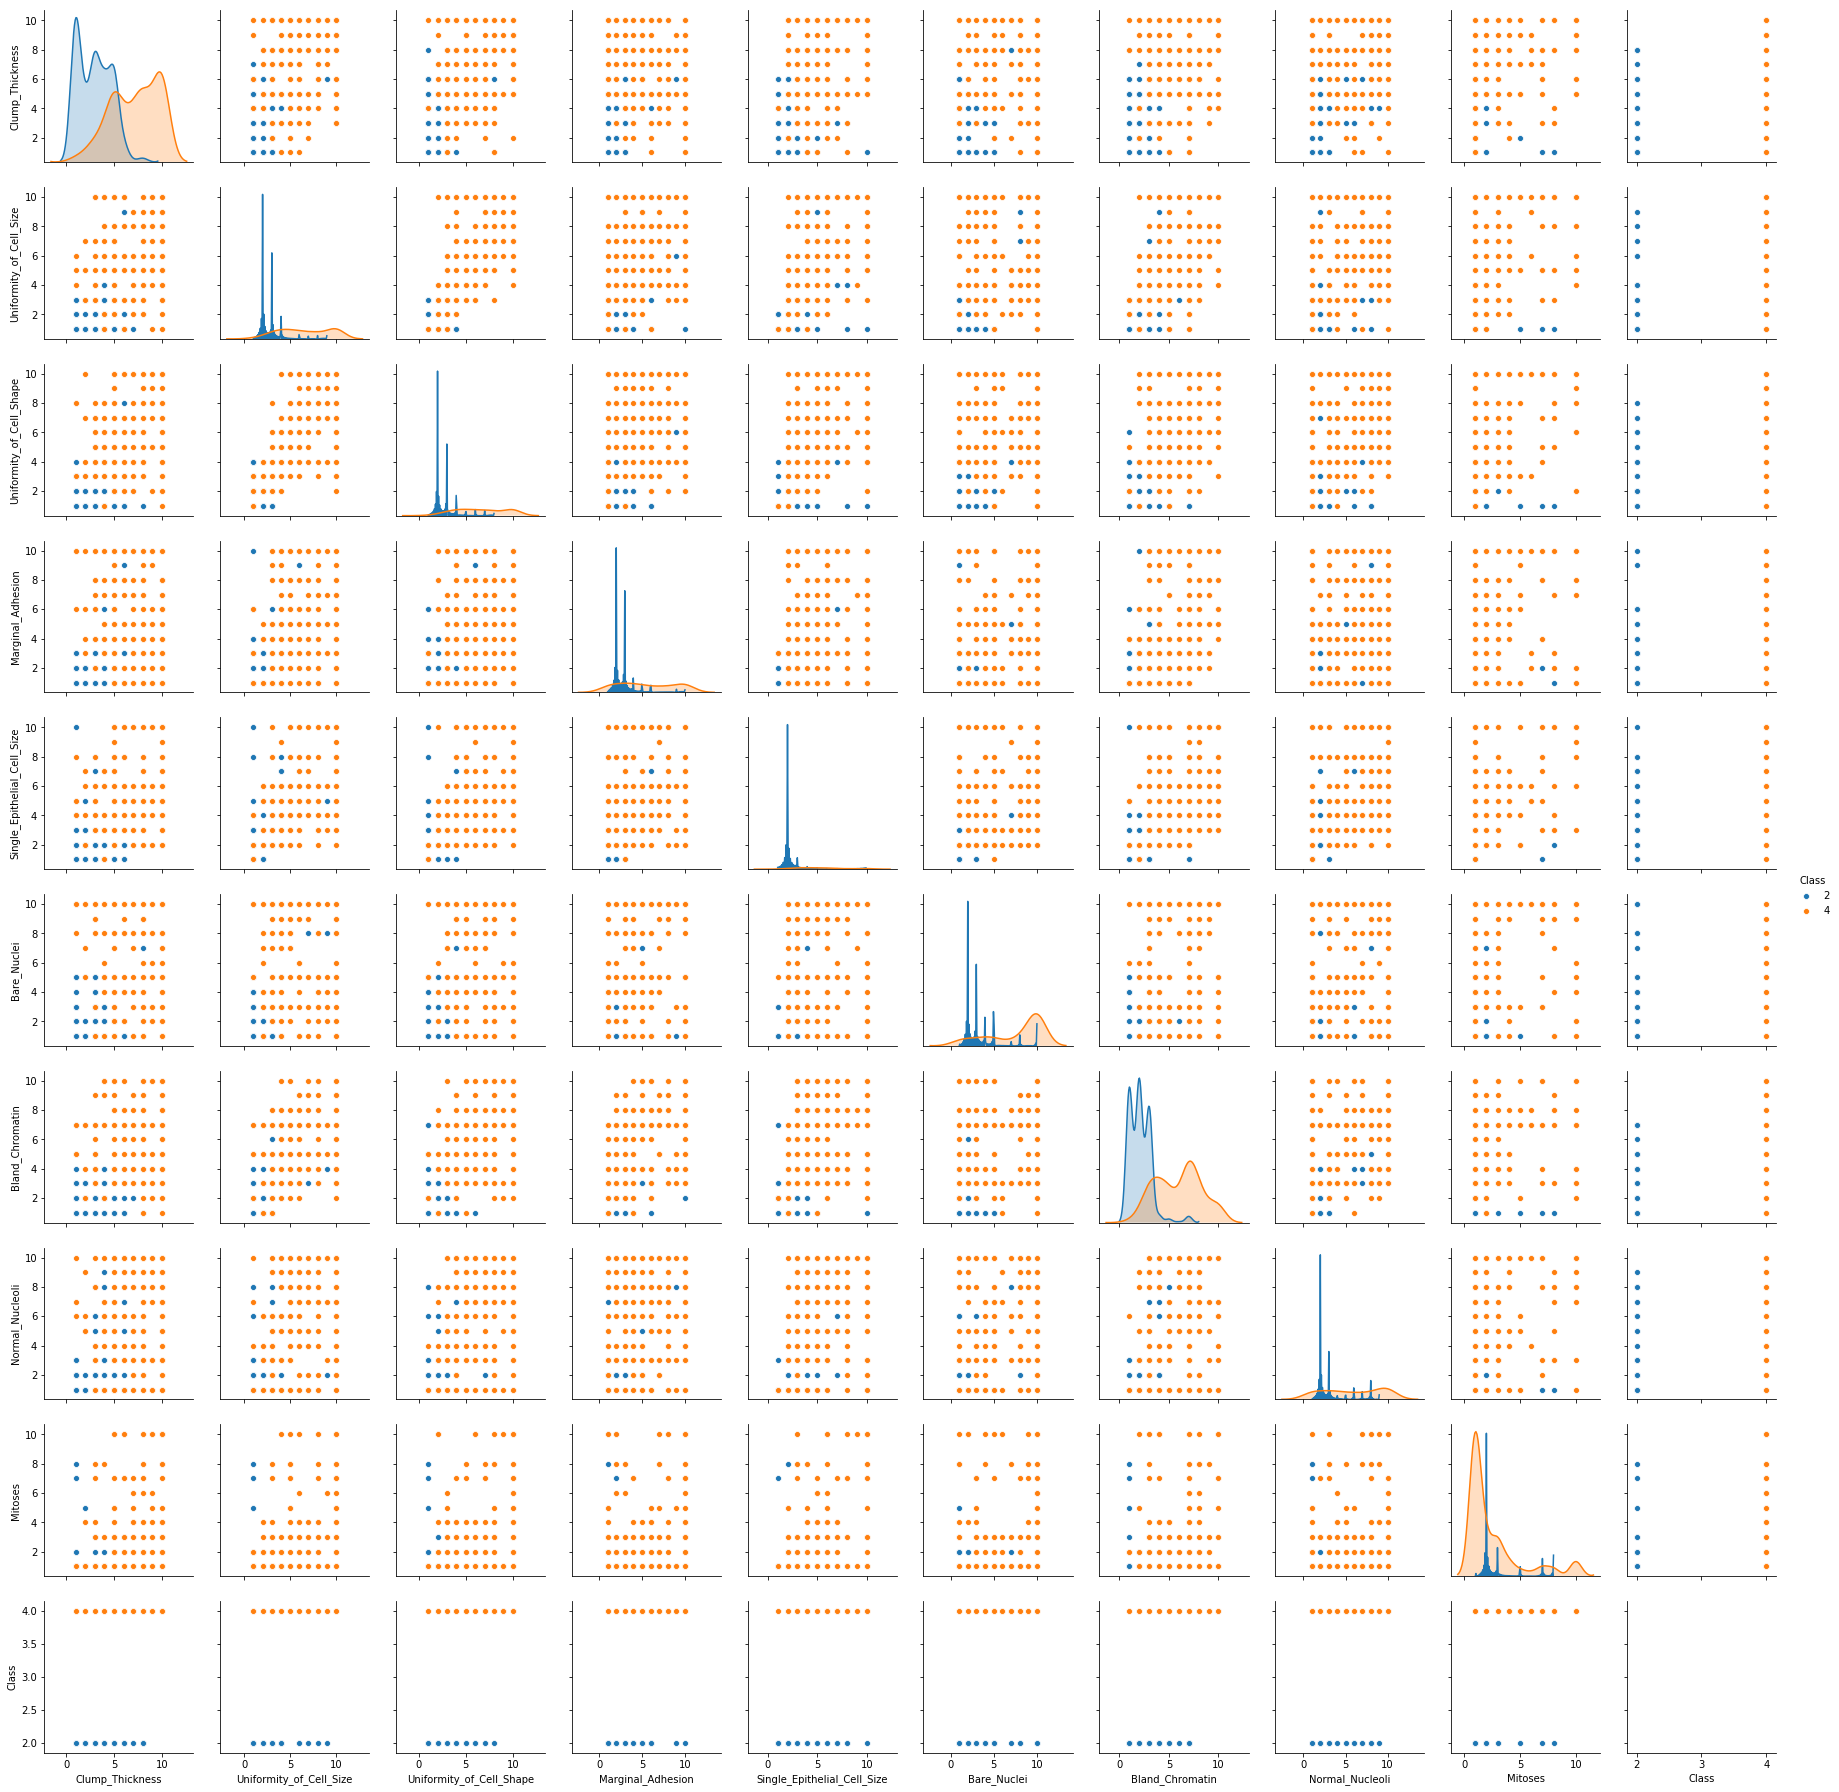

In [11]:
#Let us check for pair plots
sns.pairplot(data=cancer.iloc[:,1:12],hue='Class')

Relationship between variables shows come correlation. 
Distribution of variables shows most of the values are concentrated on lower side though range remains same for all that is between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

Since this is cancer dataset which involves data collected from people with benign or malignant cancer, we cannot consider a value as an outlier unles we know more on the subject.

Also, the pairplot shows not many outliers in the scatter datapoints.

In [12]:
from scipy.stats import zscore
x = cancer.iloc[:,1:10]
x = x.apply(zscore)
x['Class']=cancer.Class
# x.head().transpose()
cancer = x
# cancer.head().transpose()
x = x.drop(columns=['Class'])
cancer.head().transpose()

,0,1,2,3,4
Clump_Thickness,0.206936,0.206936,-0.503866,0.562336,-0.148465
Uniformity_of_Cell_Size,-0.699995,0.283845,-0.699995,1.595632,-0.699995
Uniformity_of_Cell_Shape,-0.743299,0.266875,-0.743299,1.613773,-0.743299
Marginal_Adhesion,-0.633247,0.768621,-0.633247,-0.633247,0.067687
Single_Epithelial_Cell_Size,-0.549561,1.710106,-0.549561,-0.097628,-0.549561
Bare_Nuclei,-0.686979,1.799664,-0.410685,0.141902,-0.686979
Bland_Chromatin,-0.179662,-0.179662,-0.179662,-0.179662,-0.179662
Normal_Nucleoli,-0.611825,-0.284112,-0.611825,1.354454,-0.611825
Mitoses,-0.343912,-0.343912,-0.343912,-0.343912,-0.343912
Class,2.000000,2.000000,2.000000,2.000000,2.000000


# Q6 Create a covariance matrix for identifying Principal components

In [13]:
# PCA
# Step 1 - Create covariance matrix
cov_matrix = x.cov()

# Q7 Identify eigen values and eigen vector

In [14]:
# Step 2- Get eigen values and eigen vector

In [15]:
w,v = np.linalg.eig(cov_matrix)

In [16]:
# Eigen Values:
w

array([5.8985519 , 0.77588307, 0.53960155, 0.08894898, 0.46640555,
       0.38101776, 0.26233452, 0.30405592, 0.29609474])

In [17]:
# Eigen Vector:
v

array([[-0.30280515,  0.14602888, -0.86221719,  0.0014072 , -0.08821658,
         0.07192848,  0.24081701,  0.26946934, -0.00131277],
       [-0.38119012,  0.04956364,  0.01909154,  0.73568065,  0.2026394 ,
        -0.13735749, -0.44088652,  0.1000979 ,  0.21521315],
       [-0.37757351,  0.08526953, -0.0345843 , -0.66537497,  0.17515522,
        -0.10469081, -0.58600968,  0.03200191,  0.14204379],
       [-0.33282286,  0.04471887,  0.42144828, -0.04671812, -0.4703171 ,
         0.03462797,  0.11866965,  0.68083355, -0.0861038 ],
       [-0.33639134, -0.16403795,  0.11010437, -0.06786939,  0.37332927,
        -0.68258246,  0.45057208, -0.03559797, -0.18337725],
       [-0.33349748,  0.2477099 , -0.00367104,  0.07339423, -0.5431767 ,
        -0.1275059 , -0.10299896, -0.57486596, -0.41187463],
       [-0.3459564 ,  0.22994199,  0.19744944, -0.05881119, -0.00698988,
         0.25519148,  0.40975993, -0.31459721,  0.67301535],
       [-0.33584019, -0.02502678,  0.13164974,  0.01889835,  0

# Q8 Find variance and cumulative variance by each eigen vector

In [18]:
var = []
cum_var = []
for i in range(0,len(w)):
    var.append((w[i]/sum(w))*100)
    cum_var.append(sum(var))

In [19]:
pca_var_matrix = pd.DataFrame()
pca_var_matrix['Variance'] = var
pca_var_matrix['Cumulative_Variance'] = cum_var
pca_var_matrix.set_index(keys=cov_matrix.columns)

,Variance,Cumulative_Variance
Clump_Thickness,65.445704,65.445704
Uniformity_of_Cell_Size,8.608590,74.054294
Uniformity_of_Cell_Shape,5.986995,80.041289
Marginal_Adhesion,0.986908,81.028197
Single_Epithelial_Cell_Size,5.174870,86.203067
Bare_Nuclei,4.227474,90.430541
Bland_Chromatin,2.910658,93.341199
Normal_Nucleoli,3.373566,96.714765
Mitoses,3.285235,100.000000


# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [20]:
from sklearn.decomposition import PCA

In [21]:
x_centered = x - x.mean(axis=0)

In [22]:
pca = PCA(n_components=None)
pca.fit(x_centered)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [23]:
np.cumsum(pca.explained_variance_ratio_)*100

array([ 65.4457038 ,  74.05429355,  80.04128903,  85.21615907,
        89.44363313,  92.81719904,  96.10243391,  99.01309194,
       100.        ])

In [24]:
x_pca = pca.transform(x_centered)

In [25]:
x_pca.shape

(699, 9)

In [26]:
cancer.head().transpose()

,0,1,2,3,4
Clump_Thickness,0.206936,0.206936,-0.503866,0.562336,-0.148465
Uniformity_of_Cell_Size,-0.699995,0.283845,-0.699995,1.595632,-0.699995
Uniformity_of_Cell_Shape,-0.743299,0.266875,-0.743299,1.613773,-0.743299
Marginal_Adhesion,-0.633247,0.768621,-0.633247,-0.633247,0.067687
Single_Epithelial_Cell_Size,-0.549561,1.710106,-0.549561,-0.097628,-0.549561
Bare_Nuclei,-0.686979,1.799664,-0.410685,0.141902,-0.686979
Bland_Chromatin,-0.179662,-0.179662,-0.179662,-0.179662,-0.179662
Normal_Nucleoli,-0.611825,-0.284112,-0.611825,1.354454,-0.611825
Mitoses,-0.343912,-0.343912,-0.343912,-0.343912,-0.343912
Class,2.000000,2.000000,2.000000,2.000000,2.000000


<Figure size 864x720 with 0 Axes>

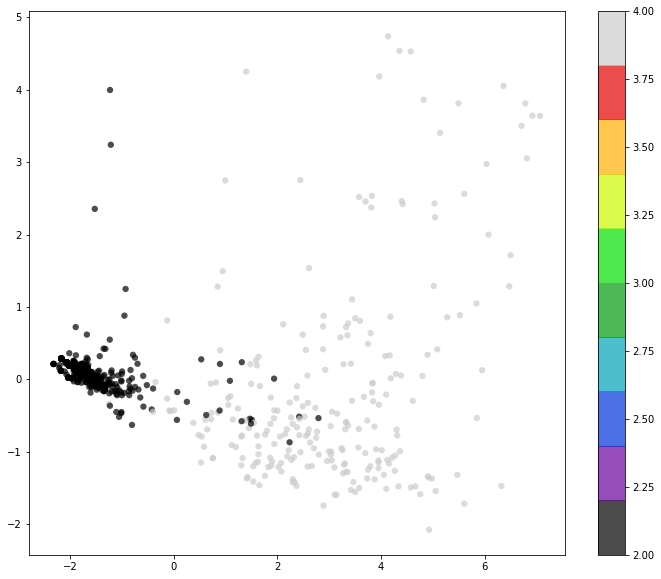

In [27]:
plt.figure(figsize=(12,10))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer.Class,edgecolor='none', alpha=0.7, s=40,cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.show()

# Q10 Find correlation between components and features

In [28]:
pca_comp = pd.DataFrame(data=pca.components_,columns=['Clump_Thickness','Uniformity_of_Cell_Size','Uniformity_of_Cell_Shape','Marginal_Adhesion','Single_Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses'])

In [29]:
pca_comp.corr()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
Clump_Thickness,1.000000,0.057378,-0.021810,0.036191,0.091807,-0.060080,0.031255,-0.004973,0.024523
Uniformity_of_Cell_Size,0.057378,1.000000,0.088015,-0.146049,-0.370486,0.242454,-0.126129,0.020070,-0.098963
Uniformity_of_Cell_Shape,-0.021810,0.088015,1.000000,0.055515,0.140827,-0.092160,0.047943,-0.007629,0.037617
Marginal_Adhesion,0.036191,-0.146049,0.055515,1.000000,-0.233682,0.152926,-0.079555,0.012659,-0.062420
Single_Epithelial_Cell_Size,0.091807,-0.370486,0.140827,-0.233682,1.000000,0.387933,-0.201810,0.032113,-0.158344
Bare_Nuclei,-0.060080,0.242454,-0.092160,0.152926,0.387933,1.000000,0.132068,-0.021016,0.103623
Bland_Chromatin,0.031255,-0.126129,0.047943,-0.079555,-0.201810,0.132068,1.000000,0.010933,-0.053907
Normal_Nucleoli,-0.004973,0.020070,-0.007629,0.012659,0.032113,-0.021016,0.010933,1.000000,0.008578
Mitoses,0.024523,-0.098963,0.037617,-0.062420,-0.158344,0.103623,-0.053907,0.008578,1.000000


# Content Based Recommendation System - Optional ( Q11 - Q19 will not be graded)

# Q11 Read the Dataset `movies_metadata.csv`

In [30]:
movie = pd.read_csv('movies_metadata.csv')

In [31]:
movie.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

Hint:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

# Q17  Create cosine similarity matrix

# Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [32]:
jokes = pd.read_excel('jokes.xlsx')

In [33]:
jokes.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [34]:
jokes.shape

(24983, 101)

In [35]:
jokes.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NumJokes,24983.0,72.467478,21.859600,36.00,53.000,72.00,100.00,100.0
Joke1,24983.0,34.401435,46.707059,-9.95,-0.150,5.05,99.00,99.0
Joke2,24983.0,27.094089,44.228006,-9.95,-2.180,3.69,99.00,99.0
Joke3,24983.0,33.263717,46.747535,-9.95,-1.145,4.66,99.00,99.0
Joke4,24983.0,36.244936,48.812967,-9.95,-3.350,3.45,99.00,99.0
Joke5,24983.0,0.427236,5.472657,-9.95,-3.690,1.12,4.47,99.0
Joke6,24983.0,19.342119,37.860770,-9.95,-0.390,3.54,8.01,99.0
Joke7,24983.0,-0.401803,5.741616,-9.95,-5.290,-0.05,3.93,99.0
Joke8,24983.0,-0.616110,5.008894,-9.95,-4.610,-0.29,3.06,99.0
Joke9,24983.0,36.228421,48.228364,-9.95,-1.775,4.03,99.00,99.0


# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [36]:
ratings = pd.DataFrame(data=jokes.iloc[0:199,1:])
ratings.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Joke1,199.0,29.856432,45.223230,-9.71,-0.875,4.22,99.000,99.00
Joke2,199.0,19.040503,38.619932,-9.95,-2.545,3.20,8.325,99.00
Joke3,199.0,35.085879,47.411062,-9.71,-0.630,5.24,99.000,99.00
Joke4,199.0,45.548392,50.337174,-9.76,-1.770,8.16,99.000,99.00
Joke5,199.0,-0.075176,5.421875,-9.81,-4.220,0.34,4.220,9.22
Joke6,199.0,31.164975,44.888461,-9.85,0.630,5.53,99.000,99.00
Joke7,199.0,0.161608,5.640026,-9.95,-4.490,0.73,4.710,9.27
Joke8,199.0,-0.096935,4.871121,-9.85,-4.270,0.58,3.450,9.27
Joke9,199.0,41.777688,49.193891,-9.85,-0.465,6.21,99.000,99.00
Joke10,199.0,16.841457,36.398155,-9.76,-1.675,2.82,8.135,99.00


# Q22 Change the column indices from 0 to 99

In [37]:
ratings.columns = range(0,100)
ratings.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,199.0,29.856432,45.223230,-9.71,-0.875,4.22,99.000,99.00
1,199.0,19.040503,38.619932,-9.95,-2.545,3.20,8.325,99.00
2,199.0,35.085879,47.411062,-9.71,-0.630,5.24,99.000,99.00
3,199.0,45.548392,50.337174,-9.76,-1.770,8.16,99.000,99.00
4,199.0,-0.075176,5.421875,-9.81,-4.220,0.34,4.220,9.22
5,199.0,31.164975,44.888461,-9.85,0.630,5.53,99.000,99.00
6,199.0,0.161608,5.640026,-9.95,-4.490,0.73,4.710,9.27
7,199.0,-0.096935,4.871121,-9.85,-4.270,0.58,3.450,9.27
8,199.0,41.777688,49.193891,-9.85,-0.465,6.21,99.000,99.00
9,199.0,16.841457,36.398155,-9.76,-1.675,2.82,8.135,99.00


# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [38]:
ratings = ratings.replace(to_replace=99,value=0)
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
ss = StandardScaler()
ratings_diff = pd.DataFrame(ss.fit_transform(ratings))
ratings_diff

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-1.852619,1.670274,-2.225498,-1.929782,-1.376572,-2.234454,-1.779576,0.878175,-2.231922,-1.138356,...,0.769406,-0.055468,-0.363221,-0.184520,-0.176378,-0.140761,-1.969924,-0.026926,-0.041548,-0.161368
1,0.795673,-0.189105,1.367864,1.319341,-0.426169,-2.498516,-0.158485,-1.079072,2.212639,1.662525,...,0.769406,-1.615692,-0.453897,2.077712,-0.233704,-0.858570,0.709555,0.070288,-1.364440,0.166246
2,-0.112313,-0.129720,-0.058714,0.186167,1.683576,1.810711,1.576368,1.927802,0.002801,-0.184694,...,-0.192960,-0.055468,-0.363221,2.428848,-0.176378,-0.140761,-0.233967,-0.026926,-0.041548,-0.161368
3,-0.112313,1.580172,-0.058714,0.186167,0.346726,1.558031,-0.529985,1.298026,0.002801,0.183949,...,-0.192960,-0.055468,-0.363221,-0.031978,-0.176378,-0.140761,-0.233967,-0.026926,-0.041548,-0.161368
4,1.779324,0.814304,-0.994065,-1.211500,0.265369,0.064712,1.222643,0.968731,-0.106695,0.963307,...,1.578203,1.703329,0.971901,1.309244,1.552481,0.379148,0.724972,1.845875,0.509657,0.328522
5,-1.485419,-0.854632,0.039980,-2.017946,-1.297063,-1.282918,-1.573385,-0.159104,-1.652089,-0.545322,...,-1.401037,-2.227173,-0.575840,-1.036455,-0.834128,-1.264435,-0.218550,-2.623114,-1.587985,-1.217694
6,-0.112313,-0.129720,-0.058714,0.186167,1.602219,-2.541768,1.343514,1.829014,0.002801,-0.184694,...,-0.192960,-0.055468,-0.363221,-0.184520,-0.176378,0.640780,-0.233967,-0.026926,-0.041548,-0.161368
7,1.409899,0.517377,1.998161,-1.424132,-1.494910,-0.686501,1.619029,0.310141,-1.288759,-1.070237,...,2.274383,-0.408489,-0.394489,-1.819314,-1.129814,-1.264435,0.425882,-0.041222,0.359607,-0.161368
8,-0.955760,-0.854632,-2.171665,-1.600461,-1.602154,-0.365528,-0.969030,-1.817927,-1.953204,-0.505252,...,1.298366,-0.146875,0.940633,-0.267987,-0.263877,-0.238034,-0.323386,-0.109844,-1.082713,-1.676965
9,0.557549,0.924884,1.096456,0.966683,1.199130,0.872834,1.558593,0.538590,0.751857,1.450155,...,-0.192960,1.353461,-0.363221,-0.184520,-0.176378,-0.140761,-0.233967,-0.026926,-0.041548,-0.161368


### Popularity based recommendation system

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [41]:
ratings_diff.mean(axis=1)

0     -0.745140
1      0.548170
2      0.598066
3      0.107379
4      0.540338
5     -1.363193
6      0.297390
7     -0.775777
8     -0.353203
9      0.549851
10     0.132269
11    -0.040005
12     0.363496
13     0.879489
14    -0.297002
15    -0.248812
16     0.017768
17     0.774740
18    -0.003687
19    -0.175376
20    -0.211950
21    -0.063153
22     0.233761
23     0.150329
24     0.013228
25     0.447612
26    -0.004735
27    -0.569373
28     0.102815
29     0.119779
         ...   
169    0.055679
170   -0.125780
171   -0.065823
172    0.132057
173   -0.039710
174    0.033939
175    0.049424
176   -0.219670
177   -0.154959
178    0.519238
179   -0.078198
180    0.002786
181   -0.695519
182   -1.119661
183    0.297300
184   -0.463721
185    0.522913
186   -0.288023
187   -0.449143
188    0.112544
189   -0.248812
190   -0.065765
191   -0.068787
192    0.570426
193    0.495411
194   -0.865667
195    0.446401
196    0.206866
197   -0.339358
198    0.063868
Length: 199, dtype: floa